In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
import warnings
warnings.simplefilter(action="ignore")

In [8]:
df = pd.read_csv("OneDrive/Desktop/Flipkart_Mobiles (3).csv")

In [13]:
df.head(20)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
5,OPPO,A53,Electric Black,6 GB,128 GB,4.3,13990,17990
6,OPPO,A12,Deep Blue,4 GB,64 GB,4.4,10490,11990
7,OPPO,A12,Black,3 GB,32 GB,4.4,9490,10990
8,OPPO,A12,Blue,3 GB,32 GB,4.4,9490,10990
9,OPPO,A12,Flowing Silver,3 GB,32 GB,4.4,9490,10990


In [10]:
df.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

In [11]:
df.shape

(3114, 8)

## Dropping rows with null memory and storage

In [14]:
df.dropna(subset=["Memory","Storage"],inplace=True)

In [15]:
df.shape # After dropping NULL values

(3032, 8)

In [16]:
df.isnull().sum() # Checking for NULL Values


Brand               0
Model               0
Color               0
Memory              0
Storage             0
Rating            135
Selling Price       0
Original Price      0
dtype: int64

##janiopjjgduhd

In [17]:
df.describe()

,Rating,Selling Price,Original Price
count,2897.000000,3032.000000,3032.000000
mean,4.241319,26186.404354,28113.184697
std,0.272841,29291.841572,30843.861948
min,2.300000,1000.000000,1000.000000
25%,4.100000,9996.000000,10490.000000
50%,4.300000,15299.500000,16990.000000
75%,4.400000,28999.000000,31489.250000
max,5.000000,179900.000000,189999.000000


# Analysing brands

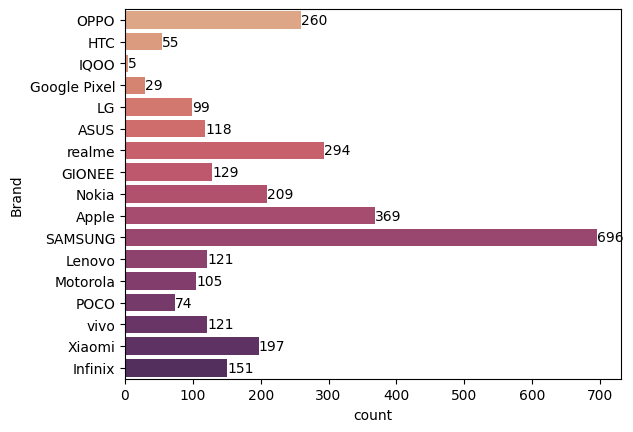

In [18]:
ax = sns.countplot(y="Brand",data=df,palette="flare")
for bars in ax.containers:
    ax.bar_label(bars)  
plt.show()

## Samsung has the most number of mobile phones followed by Apple and realme¶

## Analysing most costly brands

In [19]:
most_costly_brand = df.groupby(["Brand"],as_index=False)["Selling Price"].sum().sort_values(by="Selling Price",ascending=False)

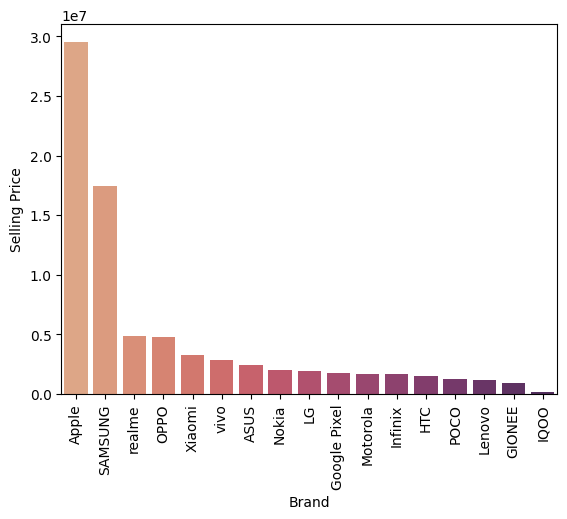

In [20]:
sns.barplot(x="Brand",y="Selling Price",data=most_costly_brand,palette="flare")
plt.xticks(rotation=90)
plt.show()

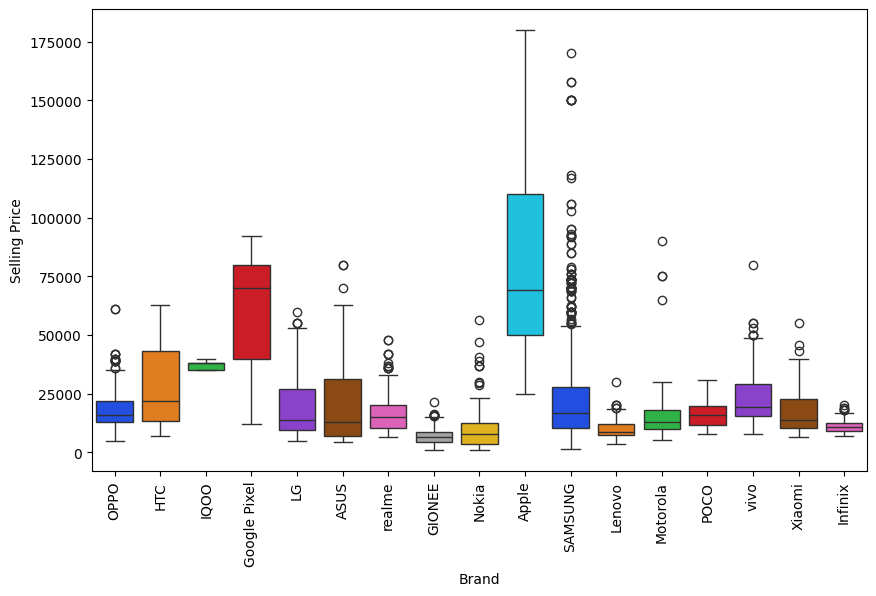

In [21]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="Brand",y="Selling Price",data=df,palette="bright")
plt.xticks(rotation=90)
plt.show()

## Apple is the most costly selling brand followed by Samsung¶

### Range Wise Analysis (Low Range(0-15000) , Mid Range(16000-40000) ,Premium Range(above 40000) Smartphones)¶

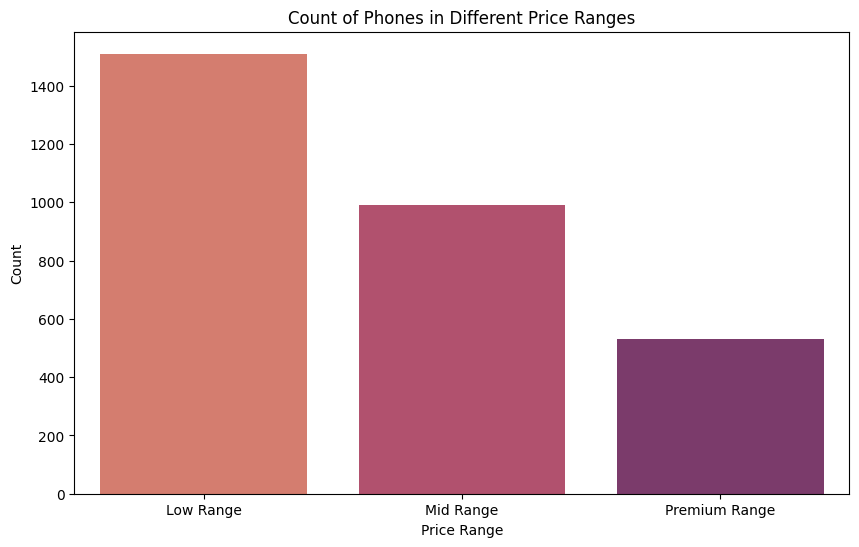

In [23]:
df["Price Range"] = pd.cut(df["Selling Price"], bins=[0, 15000, 40000, float("inf")], labels=["Low Range", "Mid Range", "Premium Range"])

plt.figure(figsize=(10, 6))
sns.countplot(x="Price Range",data=df,palette="flare")
plt.title("Count of Phones in Different Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

## Most Smartphones Belong to Low Range Category (0-15000 Rs)¶

###  Average Selling Price of Each Brand¶

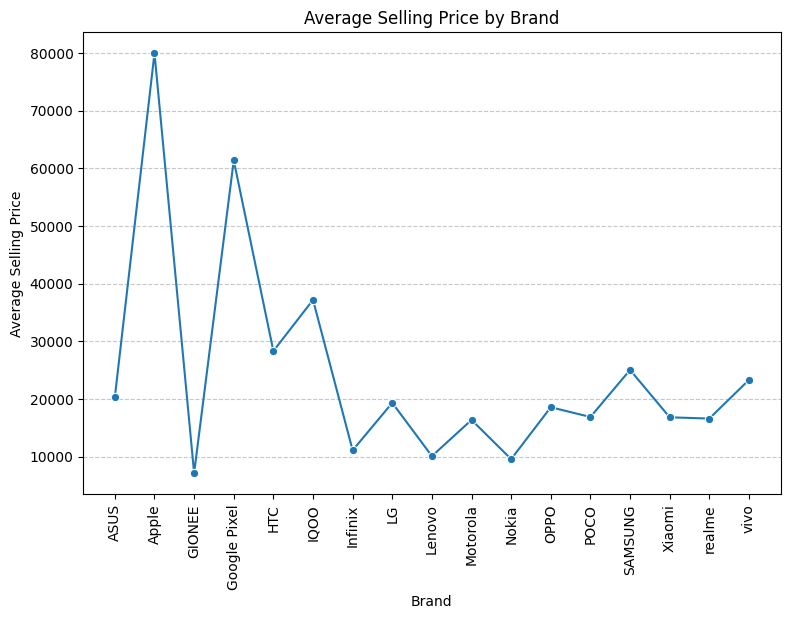

In [24]:
avg_sp_bybrand = df.groupby(["Brand"], as_index=False)["Selling Price"].mean()

plt.figure(figsize=(9, 6))
sns.lineplot(x="Brand", y="Selling Price", data=avg_sp_bybrand, marker="o")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Brand")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Apple Brand has the highest average selling price among all followed by Google Pixel then followed by IQOO¶

 ## Most Costly Selling Model in Each Brand¶

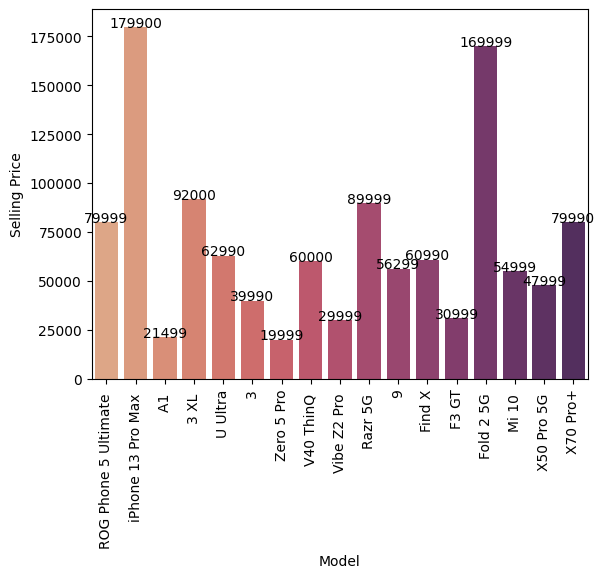

In [25]:
most_costly_model = df.loc[df.groupby("Brand")["Selling Price"].idxmax()]
ax=sns.barplot(x="Model",y="Selling Price",data=most_costly_model,palette="flare")
plt.xticks(rotation = 90)
for i,j in enumerate(most_costly_model["Selling Price"]):
    ax.text(i,j,str(j),ha="center")
plt.show()

# Most Common colors offered

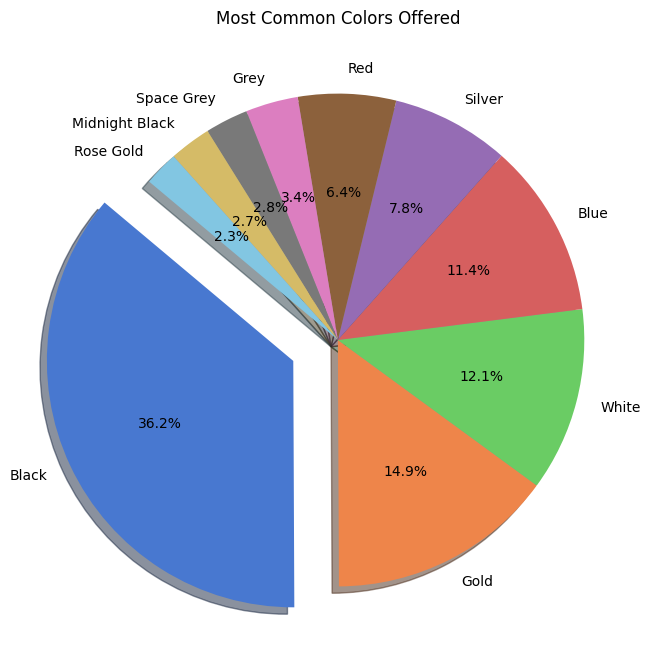

In [26]:
common_colors = df["Color"].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(common_colors,labels=common_colors.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("muted"),explode=[0.2,0,0,0,0,0,0,0,0,0],shadow=True)
plt.title("Most Common Colors Offered")
plt.show()

## Most Common Color offered is black followed by gold then followed by white and then followed by blue.¶

## Rating wise analysis of brands

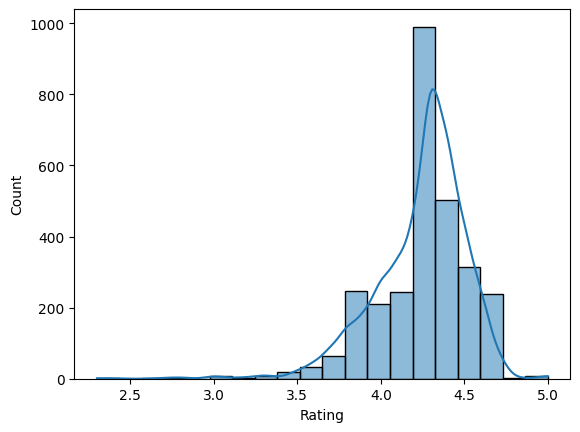

In [27]:
sns.histplot(df['Rating'], bins=20, kde=True)
plt.show()

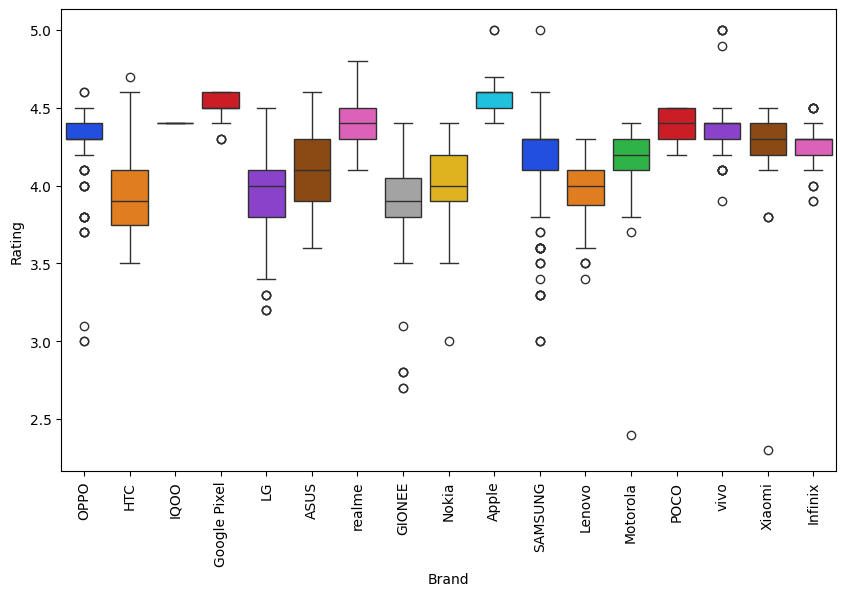

In [28]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="Brand",y="Rating",data=df,palette="bright")
plt.xticks(rotation=90)
plt.show()

# Apple is the most rated brand followed by Google Pixel¶

## Analysis By Ram Offered

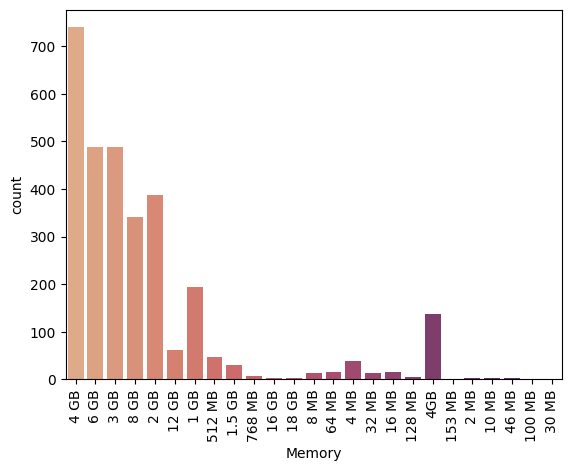

In [29]:
sns.countplot(x="Memory",data=df,palette="flare")
plt.xticks(rotation=90)
plt.show()

## Most phones which are avilable have 4gb ram

# Analysis by storage offered

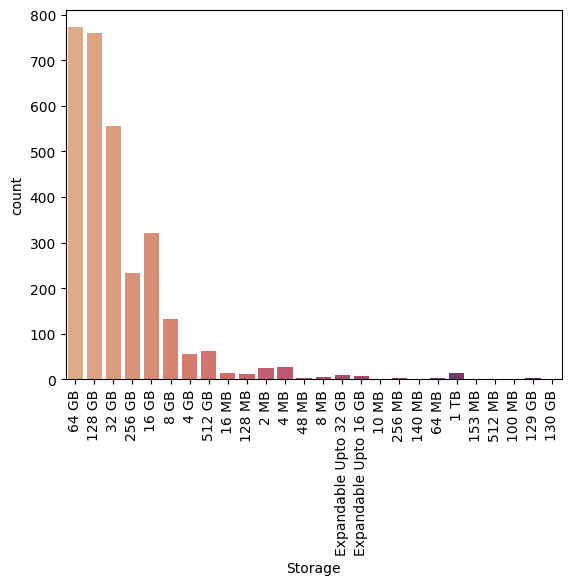

In [30]:
sns.countplot(x="Storage",data=df,palette="flare")
plt.xticks(rotation=90)
plt.show()

## Most phones which are available have 64GB Storage¶

# Top 10 rated models

In [31]:
top10_models = df.nlargest(10,"Rating")
top10_models

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Price Range
1252,Apple,iPhone 7 Plus,Red,3 GB,256 GB,5.0,85400,85400,Premium Range
1348,Apple,iPhone 7 Plus,Red,3 GB,256 GB,5.0,85400,85400,Premium Range
2021,SAMSUNG,SM-B310EZDDINS,Black,100 MB,100 MB,5.0,1949,1949,Low Range
2789,vivo,X60 Pro,Shimmer Blue,12 GB,256 GB,5.0,48780,48780,Premium Range
2791,vivo,X50,Frost Blue,8 GB,256 GB,5.0,44990,44990,Premium Range
2797,vivo,Z1x,Phantom Purple,6 GB,64 GB,5.0,19990,19990,Mid Range
2799,vivo,S2,Diamond Black,4 GB,128 GB,5.0,19990,19990,Mid Range
2771,vivo,Y33T,Mirror Black,8 GB,128 GB,4.9,22990,22990,Mid Range
3061,realme,9 5G,Meteor Black,6 GB,128 GB,4.8,17499,20999,Mid Range
3062,realme,9 5G,Stargaze White,6 GB,128 GB,4.8,17499,20999,Mid Range


# Rating V/S selling price

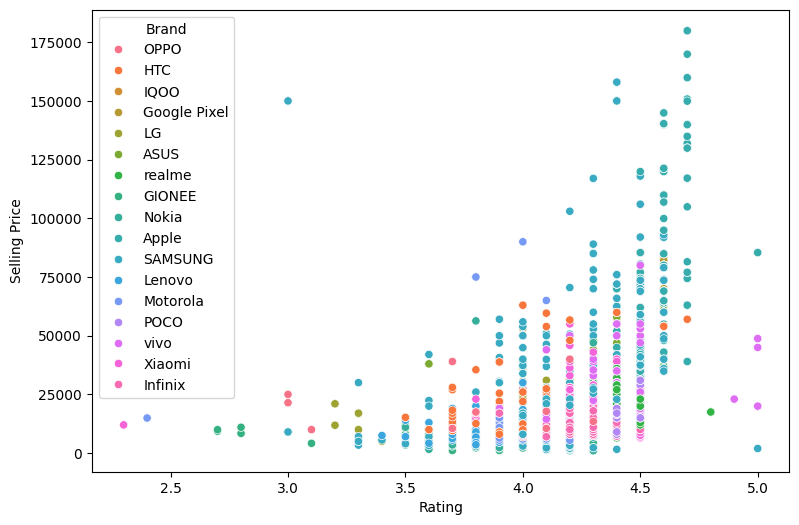

In [32]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Rating', y='Selling Price', data=df,hue="Brand")
plt.show()

# Most disocunted model

In [33]:
df['Discount Percentage'] = ((df['Original Price'] - df['Selling Price']) / df['Original Price']) * 100
df[df['Discount Percentage']==df['Discount Percentage'].max()]


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Price Range,Discount Percentage
803,GIONEE,Pioneer P3,White,512 MB,4 GB,3.6,2350,7996,Low Range,70.610305


## GIONEE Brand is offering a 70.61 percent discount on Model Pioneer P3 which is the highest discount percentage among all models¶

# Correlation Matrix

In [34]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Rating,Selling Price,Original Price,Discount Percentage
Rating,1.000000,0.458876,0.450786,0.054372
Selling Price,0.458876,1.000000,0.985189,-0.060141
Original Price,0.450786,0.985189,1.000000,0.059051
Discount Percentage,0.054372,-0.060141,0.059051,1.000000


# Heat Map

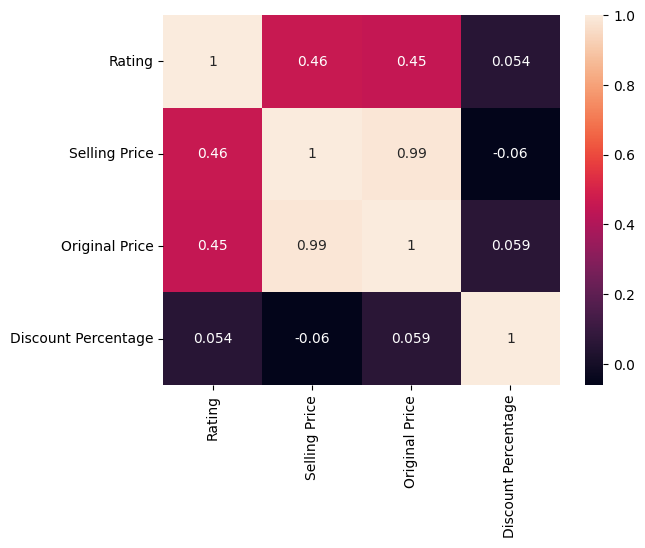

In [35]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

# CONCLUSION:-

# The availability of Low Range Phones Should be Increased as most buyers buy phones in 15000 range¶
# Vivo is providing more rated products and are value for money.
# It is not true that only higher selling price products have a higher rating maximum mobiles lying between 0 to 25000 also have a good rating